In [1]:
import pandas as pd


# Load data
data_df = pd.read_csv('marketing-campaign-with-outliers.csv')
x = data_df.tv.values
y = data_df.sales.values

In [2]:
from sklearn.linear_model import SGDRegressor

In [6]:
lr_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=10000)

In [7]:
import numpy as np

In [8]:
lr_huber.fit(x[:, np.newaxis], y)

SGDRegressor(alpha=0.0001, average=False, epsilon=1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', max_iter=10000, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [10]:
lr_huber.coef_


array([ 0.37155254])

In [11]:
lr_huber.intercept_

array([ 1.6059901])

In [12]:
x_values = np.linspace(min(x), max(x), num=100) # Shape (100,)
y_values_huber = lr_huber.predict(
    x_values[:, np.newaxis] # Shape (100,1)
)

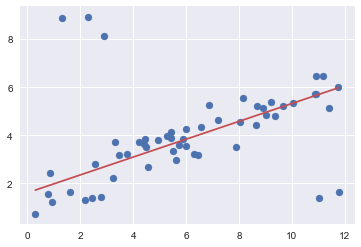

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Activate Seaborn style
sns.set()

# Get a few colors from the default color palette
blue, green, red = sns.color_palette()[:3]

# Plot the model
plt.scatter(x, y, color=blue)
plt.plot(x_values, y_values_huber, color=red)
plt.show()

In [14]:
lr_squared = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000)

In [15]:
lr_squared.fit(x[:, np.newaxis], y)

# Compute prediction line
y_values_squared = lr_squared.predict(x_values[:, np.newaxis])

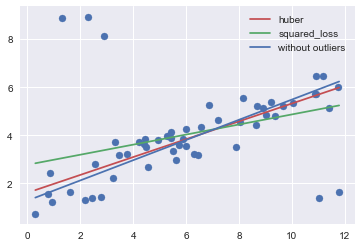

In [16]:
coefs = np.polyfit(
    x[:-5], y[:-5], # Filter outliers (the last five values)
    deg=1
)
y_values_optimal = np.polyval(coefs, x_values)

# Plot a final comparison
sns.set() # Activate Seaborn style
plt.scatter(x, y, color=blue, label=None)
plt.plot(x_values, y_values_huber, c=red, label='huber')
plt.plot(x_values, y_values_squared, c=green, label='squared_loss')
plt.plot(x_values, y_values_optimal, c=blue, label='without outliers')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import HuberRegressor

# Create a linear regression with Huber loss
lr_huber = HuberRegressor(epsilon=1.35)

# Fit the model
lr_huber.fit(x[:, np.newaxis], y)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)